## Import Libraries & data

In [1]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('economic_index.csv')

## Clean

In [3]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [4]:
df.drop(['Unnamed: 0','year', 'month'], axis=1, inplace = True)

In [5]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

## Visulaization

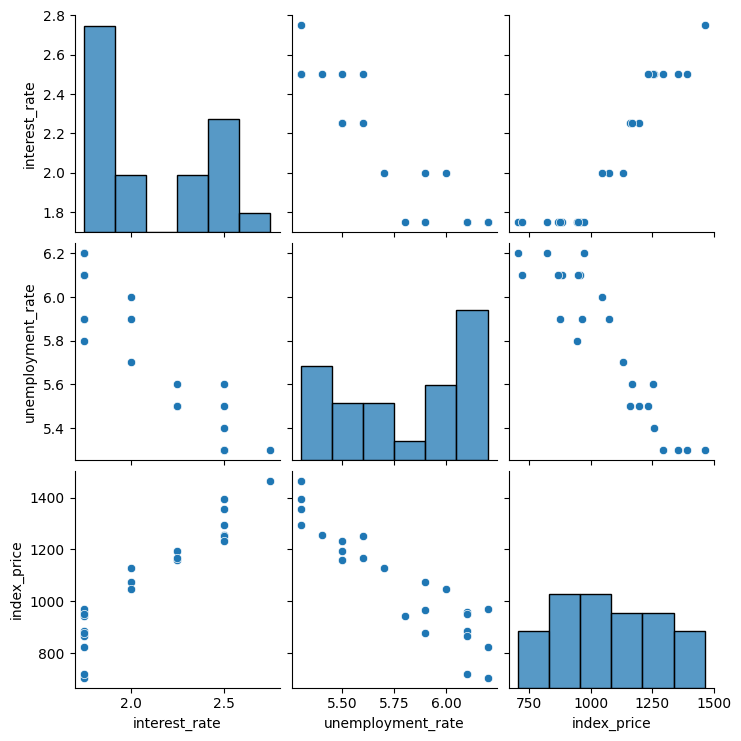

In [6]:
import seaborn as sns
sns.pairplot(df)

<Axes: xlabel='interest_rate', ylabel='index_price'>

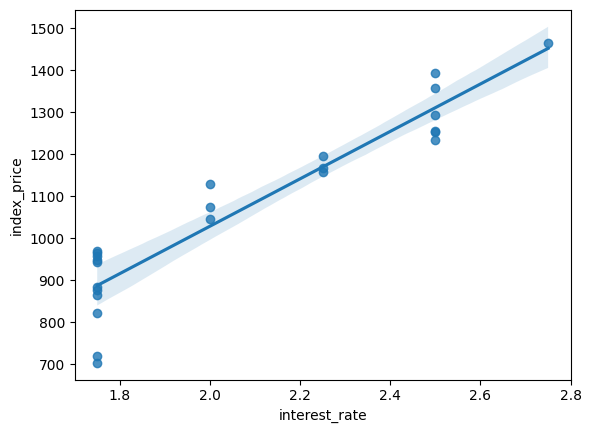

In [7]:
sns.regplot(x='interest_rate', y='index_price', data=df)

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

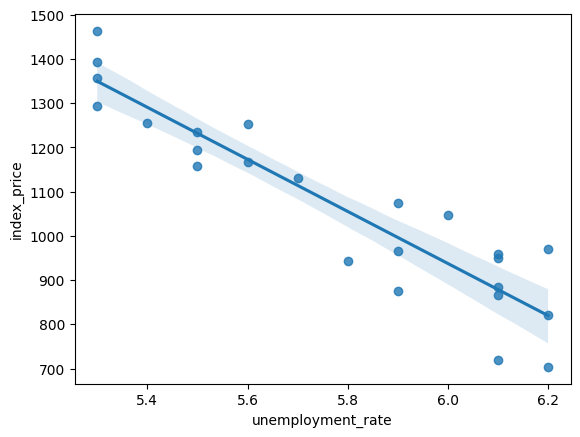

In [8]:
sns.regplot(x='unemployment_rate', y='index_price', data=df)

## Pick Independent & Dependent feature

In [9]:
X = df[['interest_rate', 'unemployment_rate']]
Y = df[['index_price']]

## Train Test Split

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test , Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 40)

## Standardization

In [11]:
from sklearn.preprocessing import StandardScaler   
scaler = StandardScaler() 

In [12]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Train Model

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
regression = LinearRegression(n_jobs  = -1)

In [15]:
regression.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [16]:
print('Coeffient or Slope:' ,regression.coef_)
print('Intercept:' ,regression.intercept_)

Coeffient or Slope: [[  77.87502964 -125.97477963]]
Intercept: [1090.1875]


## cross validation to test data 
#### ( here we are not training on cross fold,sklearn default uses 3 folds so we can check data behaiour )

In [17]:
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,Y_train,scoring='neg_mean_squared_error',
                                cv=3)

In [18]:
validation_score

array([-1639.85950232, -7057.80839499, -1120.3176843 ])

In [19]:
np.mean(validation_score)

np.float64(-3272.661860536193)

## Feeding Testing data to model

In [20]:
y_pred = regression.predict(X_test)

## performance metrics

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [22]:
mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)

MSE: 8469.659904253049
MAE: 80.81541633145623
RMSE: 92.03075520853368


In [23]:
r2 = r2_score(Y_test, y_pred)
print("R2 Score:", r2)

n = X_test.shape[0]   # number of rows
p = X_test.shape[1]   # number of predictors
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
print("Adjusted R2:", adj_r2)

R2 Score: 0.7823526937496581
Adjusted R2: 0.6952937712495213


## predection validation

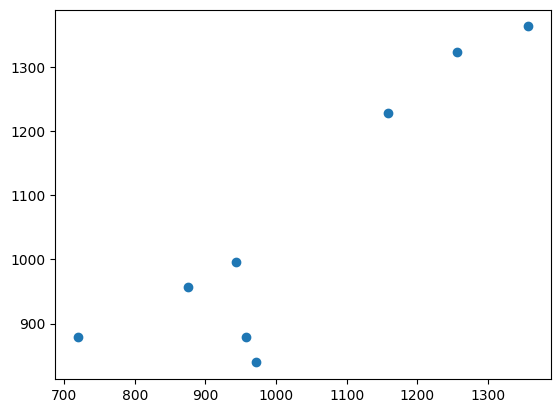

In [24]:
plt.scatter(Y_test,y_pred)

In [25]:
## actual - predecited difference
residuals=Y_test-y_pred
print(residuals)

    index_price
15    79.423572
2     -5.782784
14   -53.106195
23  -159.576428
8    -68.498391
4    -67.606195
16   131.600161
20   -80.929606


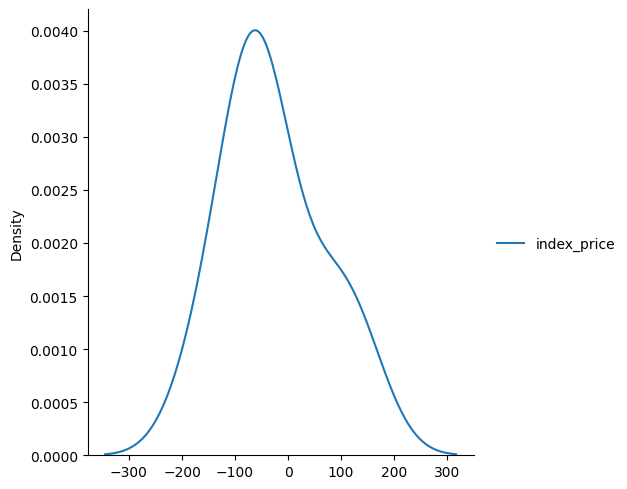

In [ ]:
## Plot this residuals
sns.displot(residuals,kind='kde') 
## bell curve should be at 0 at x-axis means fitted well. 
## on whichever direction it shift tell the direction of underpredection or overprecrtion of actual vs predicted.

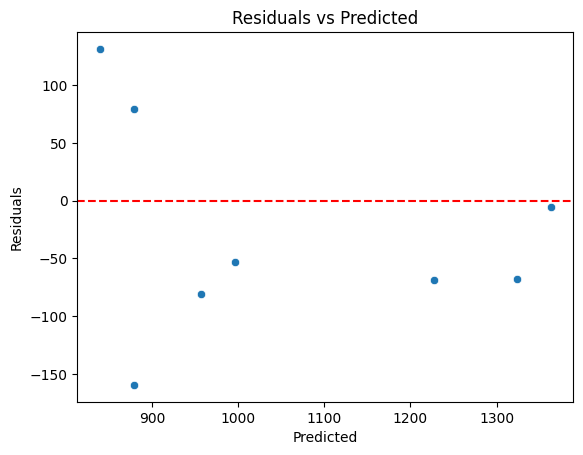

In [33]:
# sns.scatterplot(x=y_pred, y=residuals)
# plt.axhline(0import numpy as np

y_pred_1d = np.array(y_pred).ravel()
residuals_1d = np.array(residuals).ravel()

sns.scatterplot(x=y_pred_1d, y=residuals_1d)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()



# ==========================================================
# 📌 Residuals Diagnostic Checklist — Interpret Like a Pro
# ==========================================================

# 1️⃣ Mean of residuals should be ~ 0
#    GOOD 👉 Over/under predictions cancel out (no bias)
#    BAD 👎 Mostly positive → model underpredicts
#         Mostly negative → model overpredicts

# 2️⃣ Residuals should be randomly scattered around 0 line
#    GOOD 👉 No clear pattern → linear model appropriate
#    BAD 👎 Curve/Trend → nonlinear relationship not captured

# 3️⃣ Residual spread should be consistent (Homoscedasticity)
#    GOOD 👉 Equal spread → stable predictions
#    BAD 👎 Funnel/Wide at edges → heteroscedasticity (variance issue)

# 4️⃣ Residual distribution should be approx. normal (KDE/Histogram)
#    GOOD 👉 Bell-shaped centered at 0 → valid inference + stable model
#    BAD 👎 Skewed/shifted → model missing key structure or biased

# 5️⃣ No visible clusters/groups in residual plot
#    GOOD 👉 All points from same distribution → good generalization
#    BAD 👎 Clusters → missing categorical feature / segmentation needed

# 6️⃣ Few/no extreme residual points (Outliers)
#    GOOD 👉 Model stable, no weird observations
#    BAD 👎 Large residual spikes → outliers distort model fit

# ==========================================================
# ✔ Perfect Linear Regression Residual Behavior:
#    - Random scatter around the zero line
#    - No visible shape/pattern
#    - Constant variance (no funnel)
#    - Mean residual ≈ 0
#    - Normal distribution of residuals
#
# ❌ If you find issues:
#    - Add more features
#    - Try polynomial/non-linear model
#    - Transform target/variables
#    - Remove/handle outliers
#    - Re-check feature engineering
# ==========================================================



In [27]:
# Convert X_test to DataFrame (scaled values or inverse-transformed if needed)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Build full comparison table
comparison = pd.concat([
    X_test_df.reset_index(drop=True),      # all independent features
    pd.DataFrame({
        'Actual_Y': Y_test.values.flatten(),
        'Predicted_Y': y_pred.flatten(),
        'Residual': (Y_test.values.flatten() - y_pred.flatten())
    })
], axis=1)

print(comparison)


   interest_rate  unemployment_rate  Actual_Y  Predicted_Y    Residual
0      -1.050897           1.030146       958   878.576428   79.423572
1       1.142279          -1.457754      1357  1362.782784   -5.782784
2      -1.050897           0.097184       943   996.106195  -53.106195
3      -1.050897           1.030146       719   878.576428 -159.576428
4       0.411220          -0.835779      1159  1227.498391  -68.498391
5       1.142279          -1.146767      1256  1323.606195  -67.606195
6      -1.050897           1.341134       971   839.399839  131.600161
7      -1.050897           0.408171       876   956.929606  -80.929606
